In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
# change plot style
plt.style.use('ggplot')
# increase max number of columns displayed
pd.set_option('display.max_columns', 200)

In [2]:
df = pd.read_csv('Part 2 - WinesSubset.csv')

In [3]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red
0,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,1
1,8.5,0.28,0.56,1.8,0.092,35,103,0.9969,3.30,0.75,10.5,7,1
2,8.1,0.56,0.28,1.7,0.368,16,56,0.9968,3.11,1.28,9.3,5,1
3,6.3,0.39,0.16,1.4,0.080,11,23,0.9955,3.34,0.56,9.3,5,1
4,8.1,0.38,0.28,2.1,0.066,13,30,0.9968,3.23,0.73,9.7,7,1


In [4]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide       int64
total_sulfur_dioxide      int64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
red                       int64
dtype: object

In [5]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'red'],
      dtype='object')

In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
mean,8.373000,0.515350,0.278300,2.660000,0.093810,15.460000,46.990000,0.996857,3.291300,0.678100,10.434000,5.670000,1.0
std,1.763597,0.170017,0.204416,1.513041,0.060315,10.307808,32.437195,0.001990,0.156906,0.206738,1.112121,0.910711,0.0
min,5.000000,0.250000,0.000000,1.200000,0.041000,3.000000,8.000000,0.992400,2.870000,0.440000,8.400000,3.000000,1.0
25%,7.100000,0.387500,0.097500,1.900000,0.071000,6.750000,21.000000,0.995575,3.197500,0.567500,9.500000,5.000000,1.0
50%,8.050000,0.495000,0.275000,2.250000,0.081000,12.500000,40.500000,0.996900,3.305000,0.620000,10.200000,5.500000,1.0
75%,9.325000,0.635000,0.470000,2.725000,0.092000,21.000000,63.250000,0.998325,3.390000,0.740000,11.200000,6.000000,1.0
max,13.200000,1.040000,0.730000,11.000000,0.464000,46.000000,148.000000,1.001500,3.740000,1.620000,13.300000,8.000000,1.0


## Data Preperation

In [7]:
# check for missing values
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
red                     0
dtype: int64

In [8]:
# check duplicates
df.loc[df.duplicated(keep=False)]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,red
45,10.4,0.33,0.63,2.8,0.084,5,22,0.9998,3.26,0.74,11.2,7,1
47,10.4,0.33,0.63,2.8,0.084,5,22,0.9998,3.26,0.74,11.2,7,1


In [9]:
# copy of dataframe without duplicates
df = df.loc[~df.duplicated()].reset_index(drop=True).copy()

In [10]:
cont_vars = ['fixed_acidity', 'volatile_acidity', 'citric_acid',
             'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
             'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']

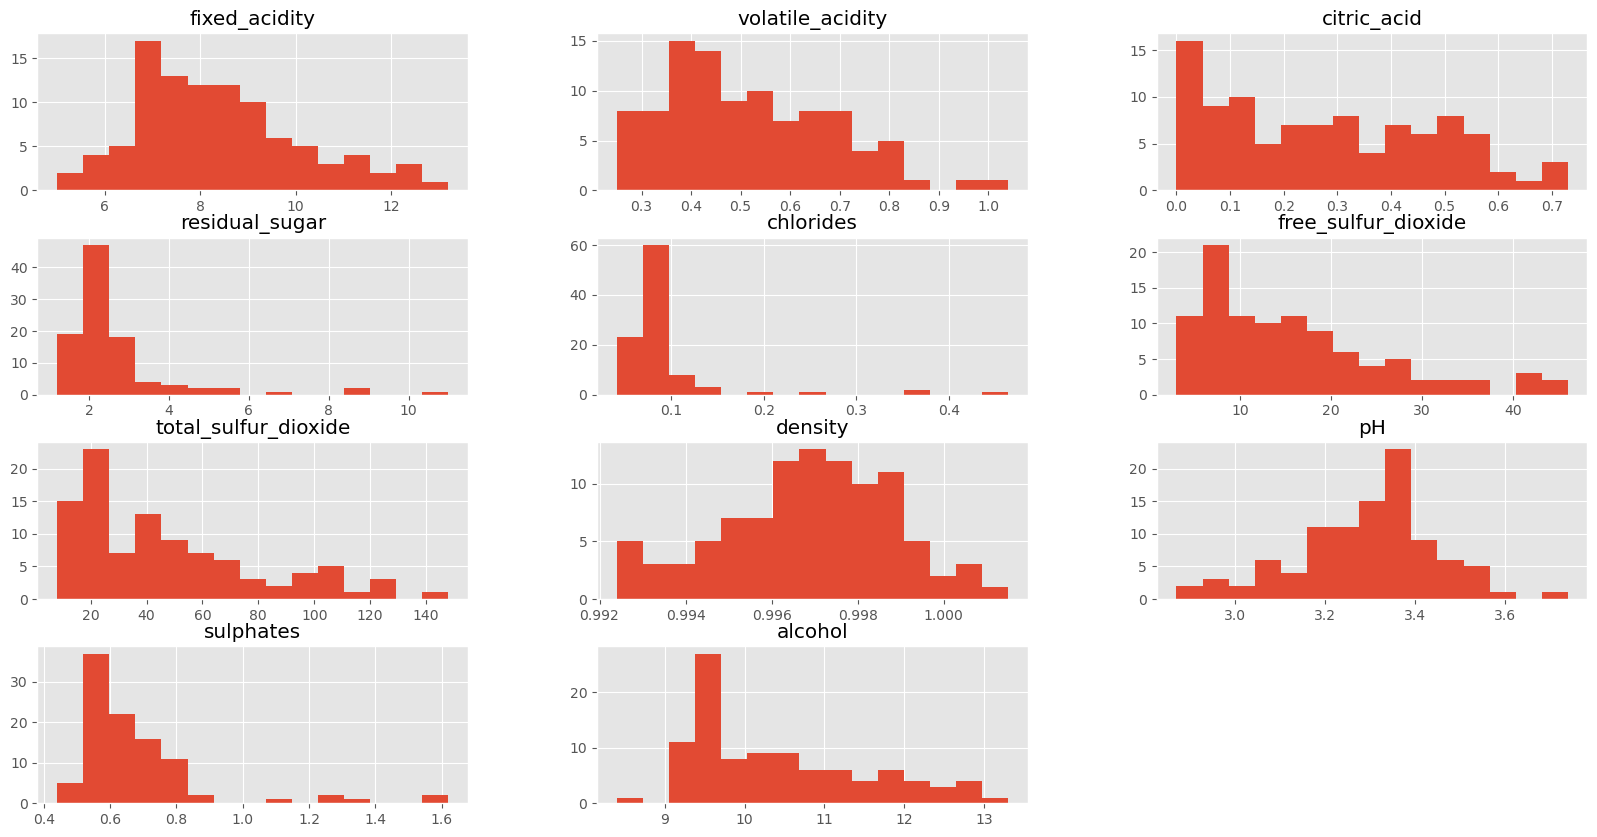

In [11]:
df[cont_vars].hist(bins=15, figsize=(20, 10))
plt.show()

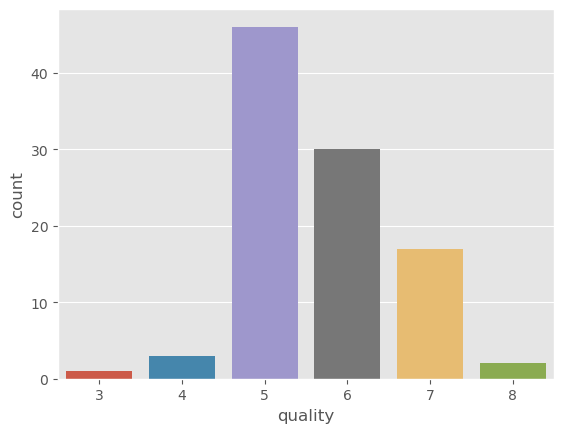

In [19]:
sns.countplot(x='quality', data=df)
plt.show()

#### 12c) Do the variables follow rather normal distributions? Which variables do (not)? 
most of the variables do not follow a normal distribution, including 'fixed_acidity', 'volatile_acicitric_acid',
'residual_sugar', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide', 'sulphates', 'alcohol'. Most of those are right-skewed.

#### 12d)  How  does  the  distribution  of  variables  influence  distances  and  clustering?  How  can  scaling variables overcome this issue?
<ul>
<li>Clustering algorithms can be sensitive to outliers in the data. Variables with a non-normal distribution may have more outliers than normally distributed variables
<li>The skewness of a variable can affect the shape of the clusters produced by clustering algorithms.
</ul>

Scaling variables does not necessarily overcome the issues of non-normal distributions, but it can help alleviate some of the problems associated with non-normal data, such as skewness stretching out clusters, when performing certain types of analyses. It is important to note that the distribution of the variables affect the standardization. For instance, a skewed data's mean and standard deviation may not be appropriate measures for scaling.

#### 12a) Why is clustering a convenient method to start understanding new fields? What does it achieve that helps managers? Explain in max. 100 words. 
#### 12b) Which of these two dendrograms would be more useful for managerial purposes? Why? Explain in max. 100 words. 

